In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
data=pd.read_csv(r'C:\Users\jagan\movie_metadata.csv')

In [124]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [125]:
data.shape

(5043, 28)

In [126]:
data.isnull().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_facebook_likes           0
genres                         0
movie_title                    0
num_voted_users                0
movie_imdb_link                0
imdb_score                     0
cast_total_facebook_likes      0
dtype: int64

In [127]:
data.dropna(axis=0,how='any',inplace=True)
data.reset_index(drop=True, inplace=True)

In [128]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [129]:
data.shape

(3756, 28)

In [130]:
numerical_features = data.select_dtypes(exclude=['object']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [131]:
num_data = data[numerical_features]
cat_data = data[categorical_features]

In [132]:
num_data.shape,cat_data.shape

((3756, 16), (3756, 12))

In [133]:
num_data.columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

Year data basically does not influence imdb score, so better remove it. 

In [134]:
num_data.drop(columns=['title_year'],axis = 1, inplace = True)

C:\Users\jagan\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [135]:
numerical_features = numerical_features.drop('title_year')

In [136]:
num_data.columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

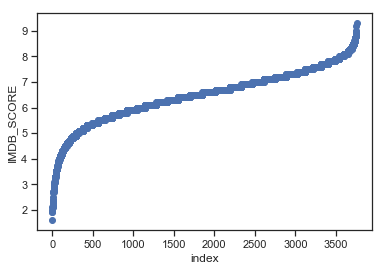

In [137]:
plt.scatter(range(num_data.shape[0]), np.sort(num_data.imdb_score.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('IMDB_SCORE', fontsize=12)
plt.show()

In [138]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    print(lower_bound)
    print(upper_bound)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [139]:
test = outliers_iqr(num_data['imdb_score'])

3.9500000000000006
9.15


In [140]:
test = list(test)

In [141]:
num_data.drop(num_data.index[test],inplace = True)
cat_data.drop(cat_data.index[test],inplace = True)

C:\Users\jagan\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
C:\Users\jagan\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [142]:
num_data.reset_index(drop=True, inplace=True)
cat_data.reset_index(drop=True, inplace=True)

In [143]:
num_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,2.35,24000


In [144]:
cat_data.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,Color,Andrew Stanton,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,English,USA,PG-13


In [145]:
num_data.columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [146]:
def scatter_with_IMDB(num_data):
    sns.set(style="ticks")
    
    fig, ax = plt.subplots(figsize=(20,20), ncols=3, nrows= int(num_data.shape[1]/3))
    col = 0
    row = 0
    for feat in num_data.columns.tolist():
        ax[row,col].set(ylabel='IMDB Score', xlabel=feat)
        ax[row,col].scatter(x=num_data[feat], y=num_data['imdb_score'], color="b")
        col = col + 1
        if (col == 3):
            col = 0
            row = row + 1
        

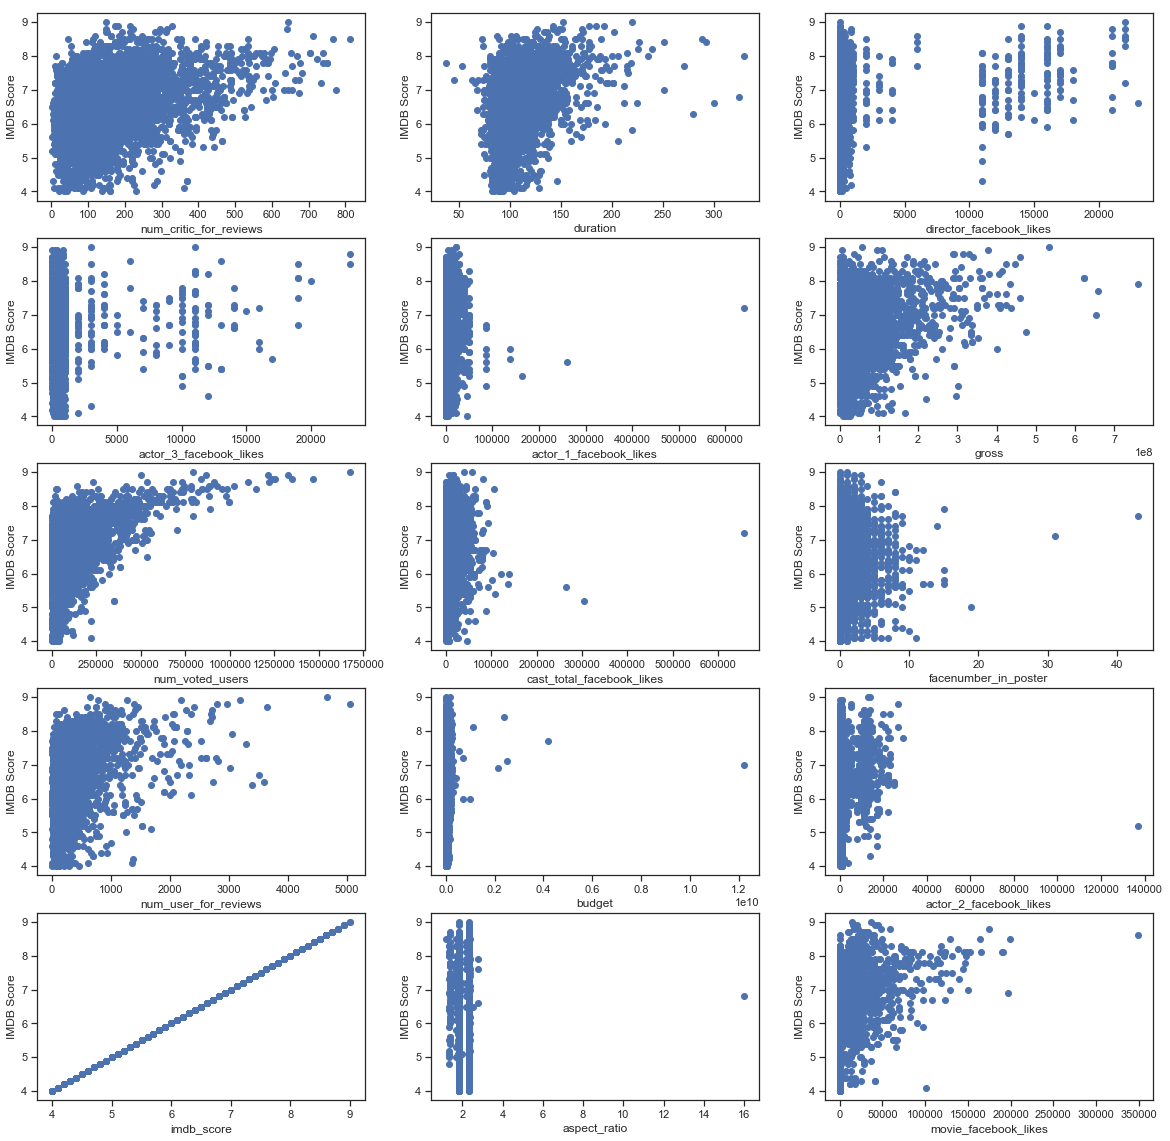

In [147]:
scatter_with_IMDB(num_data)

In [148]:
corrmat = num_data.corr()
corrmat.sort_values(["imdb_score"], ascending = False, inplace = True)
print(corrmat.imdb_score)

imdb_score                   1.000000
num_voted_users              0.506764
duration                     0.366630
num_user_for_reviews         0.347274
num_critic_for_reviews       0.339870
movie_facebook_likes         0.291301
gross                        0.207192
director_facebook_likes      0.201054
actor_2_facebook_likes       0.091137
cast_total_facebook_likes    0.089573
actor_1_facebook_likes       0.077327
actor_3_facebook_likes       0.057174
budget                       0.026574
aspect_ratio                 0.008910
facenumber_in_poster        -0.066593
Name: imdb_score, dtype: float64


So we can remove actor_2_facebook_likes, cast_total_facebook_likes, actor_1_facebook_likes, actor_3_facebook_likes, budget, aspect_ratio, facenumber_in_poster

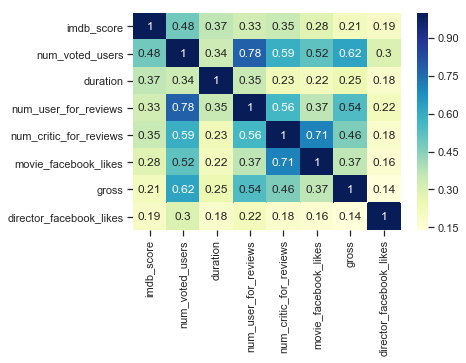

In [149]:
top_corr_features = corrmat.index[abs(corrmat["imdb_score"])>0.1]
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [150]:
num_data.drop([
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'budget',
 'actor_2_facebook_likes',
 'aspect_ratio'],inplace = True,axis = 1)

C:\Users\jagan\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [151]:
num_data.columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'gross',
 'num_voted_users',
 'num_user_for_reviews',
 'imdb_score',
 'movie_facebook_likes']

In [152]:
num_data.isnull().values.any()

False

In [153]:
cat_data.columns.tolist()

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

In [154]:
cat_data.shape

(3669, 12)

In [155]:
cat_data.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,Color,Andrew Stanton,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,English,USA,PG-13


In [156]:
df_genres = pd.DataFrame(cat_data['genres'])
df_genres.head()
# df_genres.genres[0]
# df_genres.shape
len(df_genres)

3669

In [159]:
total=0
for i in range(len(df_genres)):
    c=df_genres.loc[i, 'genres'].count('|')
    if(c>total):
        total=c
print(total)

7


In [160]:
df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns = ["Genre_"+str(i) for i in  range(0,8)] )
df_genres = df_genres.reindex(cat_data.index)

In [161]:
df_genres.head()

,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7
0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Action,Adventure,Fantasy,None,None,None,None,None
2,Action,Adventure,Thriller,None,None,None,None,None
3,Action,Thriller,None,None,None,None,None,None
4,Action,Adventure,Sci-Fi,None,None,None,None,None


In [162]:
cat_data.shape

(3669, 12)

In [163]:
cat_data.drop('genres',inplace = True, axis = 1)

C:\Users\jagan\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [164]:
cat_data.shape

(3669, 11)

In [165]:
df_genres.shape

(3669, 8)

In [166]:
cat_data = cat_data.merge(df_genres,left_index = True,right_index = True)

In [167]:
cat_data.shape

(3669, 19)

In [168]:
cat_data.head()

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None,None,None
2,Color,Sam Mendes,Rory Kinnear,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,Action,Adventure,Thriller,None,None,None,None,None
3,Color,Christopher Nolan,Christian Bale,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,Action,Thriller,None,None,None,None,None,None
4,Color,Andrew Stanton,Samantha Morton,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Sci-Fi,None,None,None,None,None


In [169]:
df_plot_keywords = pd.DataFrame(cat_data['plot_keywords'])

In [170]:
total=0
for i in range(len(df_plot_keywords)):
    c=df_plot_keywords.loc[i, 'plot_keywords'].count('|')
    if(c>total):
        total=c
print(total)

4


In [171]:
df_plot_keywords = pd.DataFrame(df_plot_keywords.plot_keywords.str.split('|').tolist(),columns = ["plot_keywords_"+str(i) for i in  range(0,5)] )
cat_data.drop('plot_keywords',inplace = True, axis = 1)
df_plot_keywords = df_plot_keywords.reindex(cat_data.index)
cat_data = cat_data.merge(df_plot_keywords,left_index = True,right_index = True)

In [172]:
cat_data.shape

(3669, 23)

In [173]:
cat_data.head()

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,movie_imdb_link,language,country,content_rating,...,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,...,Sci-Fi,None,None,None,None,avatar,future,marine,native,paraplegic
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,...,None,None,None,None,None,goddess,marriage ceremony,marriage proposal,pirate,singapore
2,Color,Sam Mendes,Rory Kinnear,Christoph Waltz,Spectre,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,...,None,None,None,None,None,bomb,espionage,sequel,spy,terrorist
3,Color,Christopher Nolan,Christian Bale,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,...,None,None,None,None,None,deception,imprisonment,lawlessness,police officer,terrorist plot
4,Color,Andrew Stanton,Samantha Morton,Daryl Sabara,John Carter,Polly Walker,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,English,USA,PG-13,...,None,None,None,None,None,alien,american civil war,male nipple,mars,princess


In [174]:
cat_data.isnull().values.any()

True

In [175]:
cat_data.nunique().sort_values()

color                 2
Genre_7               2
Genre_6               8
Genre_5              11
content_rating       12
Genre_4              15
Genre_3              16
Genre_0              17
Genre_2              20
Genre_1              20
language             34
country              45
actor_1_name       1395
director_name      1610
plot_keywords_0    1621
plot_keywords_4    1831
plot_keywords_1    1932
plot_keywords_3    1989
plot_keywords_2    2066
actor_2_name       2148
actor_3_name       2541
movie_title        3570
movie_imdb_link    3571
dtype: int64

In [176]:
cat_data.drop(['movie_imdb_link'],inplace = True, axis = 1)

In [177]:
cat_data.shape

(3669, 22)

In [181]:
num_data.shape

(3669, 8)

In [178]:
whole_data = pd.concat([num_data,cat_data],axis = 1)

In [179]:
whole_data.shape

(3669, 30)

In [180]:
y = whole_data['imdb_score']

In [182]:
whole_data.drop('imdb_score',axis = 1,inplace = True)

In [183]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(whole_data,y, random_state = 0,test_size = 0.20) # test_size = 0.10

In [184]:
num_feat = whole_data.select_dtypes(exclude=['object']).columns.tolist()
cat_feat = whole_data.select_dtypes(include=['object']).columns.tolist()

In [185]:
X_train_num = X_train[num_feat]

X_train_cat = X_train[cat_feat]

In [186]:
X_test_num = X_test[num_feat]

X_test_cat = X_test[cat_feat]

In [189]:
from scipy.stats import skew 
skewness = X_train_num.apply(lambda x: skew(x.dropna()))

In [193]:
X_train_num.isnull().values.any()

False

In [221]:
X_train_num.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,movie_facebook_likes
900,-0.147311,0.225348,-0.091206,0.544134,-0.130200,0.174873,0.539841
3579,0.225615,3.434353,-1.608853,-2.057025,1.110927,1.050598,1.087300
217,2.230894,0.737643,-1.608853,0.951256,1.603760,2.412977,1.578223
670,0.826390,0.510613,0.608273,0.931549,1.523128,1.404426,-1.011439
1702,-1.684491,-0.503361,-0.871702,-0.130818,-0.783137,-0.962190,0.289500


In [194]:
skewness.head()

num_critic_for_reviews     1.438439
duration                   2.482424
director_facebook_likes    4.606652
gross                      3.087998
num_voted_users            3.397197
dtype: float64

In [195]:
skewness = skewness[abs(skewness) > 0.75]

In [196]:
skewness.head()

num_critic_for_reviews     1.438439
duration                   2.482424
director_facebook_likes    4.606652
gross                      3.087998
num_voted_users            3.397197
dtype: float64

In [197]:
skew_features = X_train_num[skewness.index]

In [198]:
skew_features.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,movie_facebook_likes
900,113.0,113.0,39.0,54997476.0,40362,248.0,970
3579,153.0,202.0,0.0,269061.0,229012,596.0,11000
217,775.0,124.0,0.0,126464904.0,456260,2326.0,97000
670,249.0,119.0,218.0,121468960.0,407601,849.0,0
1702,32.0,99.0,5.0,13829734.0,16194,79.0,319


In [199]:
skew_features  = np.log1p(skew_features)
X_train_num[skewness.index] = skew_features

C:\Users\jagan\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [200]:
X_train_num.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,movie_facebook_likes
900,4.736198,4.736198,3.688879,17.822798,10.605669,5.517453,6.878326
3579,5.036953,5.313206,0.000000,12.502697,12.341534,6.391917,9.305741
217,6.654153,4.828314,0.000000,18.655475,13.030820,7.752335,11.482477
670,5.521461,4.787492,5.389072,18.615169,12.918046,6.745236,0.000000
1702,3.496508,4.605170,1.791759,16.442332,9.692458,4.382027,5.768321


Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [202]:
# from sklearn.preprocessing import StandardScaler
# data = [[0, 0], [0, 0], [1, 1], [1, 1]]
# scaler = StandardScaler()
# print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [205]:
# print(scaler.mean_)
# print(scaler.scale_)
# print(scaler.var_)
# print(scaler.transform(data))

[0.5 0.5]
[0.5 0.5]
[0.25 0.25]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [206]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)

In [217]:
X_train_num_scaled[:]

array([[-0.14731148,  0.22534773, -0.0912058 , ..., -0.13019965,
         0.17487285,  0.53984142],
       [ 0.22561457,  3.43435286, -1.60885253, ...,  1.11092696,
         1.05059753,  1.08730028],
       [ 2.23089355,  0.73764336, -1.60885253, ...,  1.60375986,
         2.4129765 ,  1.5782229 ],
       ...,
       [ 0.03447239,  0.64794042,  0.45802873, ..., -0.01825713,
        -0.05464337, -1.01143878],
       [ 0.94457197,  0.69297274,  1.04233595, ...,  1.02239728,
         0.62933592,  1.59609597],
       [ 0.62195066, -0.17930061,  0.94872953, ..., -0.64465717,
         0.29594889,  0.46082223]])

In [207]:
print(num_feat)

['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'gross', 'num_voted_users', 'num_user_for_reviews', 'movie_facebook_likes']


In [213]:
X_train_num.loc[:,'duration']

900     4.736198
3579    5.313206
217     4.828314
670     4.787492
1702    4.605170
1139    4.418841
1999    4.532599
2780    4.753590
3389    4.634729
2678    4.634729
728     4.682131
3393    4.574711
1793    4.709530
3276    4.709530
1680    4.820282
2238    4.682131
2951    4.787492
2641    4.653960
3330    4.543295
1068    4.510860
896     4.890349
641     4.882802
840     4.605170
3314    4.595120
1300    4.691348
2751    4.691348
3225    4.605170
1094    4.709530
559     4.709530
1525    4.718499
          ...   
1940    4.820282
2825    5.204007
2120    4.624973
2893    4.653960
537     4.477337
1701    4.709530
2897    4.867534
2222    4.510860
2135    4.779123
2599    4.532599
3558    4.406719
705     4.753590
2362    4.553877
3468    4.605170
2648    4.762174
3544    4.727388
3142    4.564348
2647    4.727388
1828    4.905275
1778    4.919981
277     4.595120
1033    4.897840
3431    4.644391
1731    4.691348
763     4.644391
835     5.141664
3264    4.521789
1653    4.8121

In [215]:
X_train_num_scaled[:, 0]

array([-0.14731148,  0.22561457,  2.23089355, ...,  0.03447239,
        0.94457197,  0.62195066])

In [220]:
X_train_num.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,movie_facebook_likes
900,-0.147311,0.225348,-0.091206,0.544134,-0.130200,0.174873,0.539841
3579,0.225615,3.434353,-1.608853,-2.057025,1.110927,1.050598,1.087300
217,2.230894,0.737643,-1.608853,0.951256,1.603760,2.412977,1.578223
670,0.826390,0.510613,0.608273,0.931549,1.523128,1.404426,-1.011439
1702,-1.684491,-0.503361,-0.871702,-0.130818,-0.783137,-0.962190,0.289500


In [219]:
for i, col in enumerate(num_feat):
    X_train_num.loc[:,col] = X_train_num_scaled[:, i]
X_train_num.head()

C:\Users\jagan\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,movie_facebook_likes
900,-0.147311,0.225348,-0.091206,0.544134,-0.130200,0.174873,0.539841
3579,0.225615,3.434353,-1.608853,-2.057025,1.110927,1.050598,1.087300
217,2.230894,0.737643,-1.608853,0.951256,1.603760,2.412977,1.578223
670,0.826390,0.510613,0.608273,0.931549,1.523128,1.404426,-1.011439
1702,-1.684491,-0.503361,-0.871702,-0.130818,-0.783137,-0.962190,0.289500


In [222]:
from scipy.stats import skew 
skewness = X_test_num.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.75]
skew_features = X_test_num[skewness.index]
skew_features  = np.log1p(skew_features)
X_test_num[skewness.index] = skew_features

C:\Users\jagan\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [223]:
X_test_num_scaled = scaler.transform(X_test_num)

In [224]:
for i, col in enumerate(num_feat):
    X_test_num.loc[:,col] = X_test_num_scaled[:, i]

C:\Users\jagan\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [225]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(X_train_num, y_train)
dt_score_train = dt.score(X_train_num, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test_num, y_test)
print("Testing score: ",dt_score_test)

C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Training score:  0.9317547180786121
Testing score:  0.45923094492049255


In [226]:
df = pd.DataFrame(data = dt.feature_importances_,index = X_train_num.columns.tolist())

In [227]:
df.head()

,0
num_critic_for_reviews,0.077221
duration,0.142712
director_facebook_likes,0.071706
gross,0.163039
num_voted_users,0.398859


In [228]:
df = df[df.iloc[:,0] > 0].sort_values(by = 0,ascending = False)

In [229]:
df.head()

,0
num_voted_users,0.398859
gross,0.163039
duration,0.142712
num_user_for_reviews,0.095193
num_critic_for_reviews,0.077221


loc gets rows (or columns) with particular labels from the index.\n
iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

Text(0.5,0,'importance')

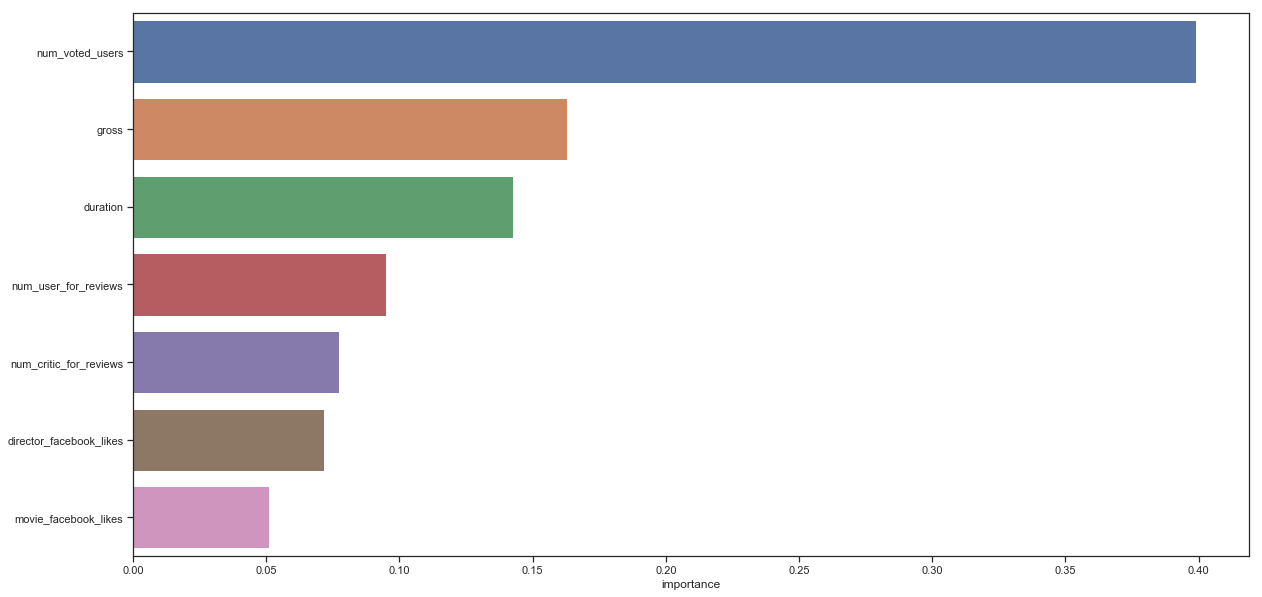

In [231]:
df = df[df.iloc[:,0] > 0].sort_values(by = 0,ascending = False)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = df.index, x= df[0])
plt.xlabel('importance')

In [234]:
import copy
X_train_hash = copy.copy(X_train_cat)
X_test_hash = copy.copy(X_test_cat)

In [236]:
X_train_hash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935 entries, 900 to 2732
Data columns (total 22 columns):
color              2935 non-null object
director_name      2935 non-null object
actor_2_name       2935 non-null object
actor_1_name       2935 non-null object
movie_title        2935 non-null object
actor_3_name       2935 non-null object
language           2935 non-null object
country            2935 non-null object
content_rating     2935 non-null object
Genre_0            2935 non-null object
Genre_1            2660 non-null object
Genre_2            1895 non-null object
Genre_3            890 non-null object
Genre_4            286 non-null object
Genre_5            58 non-null object
Genre_6            14 non-null object
Genre_7            1 non-null object
plot_keywords_0    2935 non-null object
plot_keywords_1    2927 non-null object
plot_keywords_2    2926 non-null object
plot_keywords_3    2918 non-null object
plot_keywords_4    2912 non-null object
dtypes: object(22)
m

In [237]:
for i in range(X_train_cat.shape[1]):
    X_train_hash.iloc[:,i]=X_train_hash.iloc[:,i].astype('str')
for i in range(X_test_hash.shape[1]):
    X_test_hash.iloc[:,i]=X_test_hash.iloc[:,i].astype('str')

In [238]:
X_train_hash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935 entries, 900 to 2732
Data columns (total 22 columns):
color              2935 non-null object
director_name      2935 non-null object
actor_2_name       2935 non-null object
actor_1_name       2935 non-null object
movie_title        2935 non-null object
actor_3_name       2935 non-null object
language           2935 non-null object
country            2935 non-null object
content_rating     2935 non-null object
Genre_0            2935 non-null object
Genre_1            2935 non-null object
Genre_2            2935 non-null object
Genre_3            2935 non-null object
Genre_4            2935 non-null object
Genre_5            2935 non-null object
Genre_6            2935 non-null object
Genre_7            2935 non-null object
plot_keywords_0    2935 non-null object
plot_keywords_1    2935 non-null object
plot_keywords_2    2935 non-null object
plot_keywords_3    2935 non-null object
plot_keywords_4    2935 non-null object
dtypes: obj

In [243]:
X_train_hash.values

array([['Color', 'Gary Fleder', 'Jennifer Esposito', ..., 'psychiatrist',
        'vomiting', 'voyeur'],
       [' Black and White', 'Akira Kurosawa', 'Minoru Chiaki', ...,
        'japan', 'practice', 'samurai'],
       ['Color', 'Ridley Scott', 'Charlize Theron', ..., 'planet',
        'pregnant with an alien fetus', 'suspended animation'],
       ...,
       ['Color', 'Gavin Hood', 'Jake Gyllenhaal', ..., 'cia',
        'detention', 'interrogation'],
       ['Color', 'Richard Curtis', 'Tom Hollander', ..., 'time travel',
        'time travel romance', 'wedding'],
       ['Color', 'Robert Altman', 'Virginia Madsen', ..., 'cowboy',
        'radio', 'singing']], dtype=object)

In [244]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10000,input_type="string")
X_train_hash = h.transform(X_train_hash.values)
X_test_hash = h.transform(X_test_hash.values)

In [245]:
X_train_cat.head()

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,language,country,content_rating,Genre_0,...,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4
900,Color,Gary Fleder,Jennifer Esposito,Oliver Platt,Don't Say a Word,Conrad Goode,English,USA,R,Crime,...,Thriller,None,None,None,None,mental institution,post traumatic stress,psychiatrist,vomiting,voyeur
3579,Black and White,Akira Kurosawa,Minoru Chiaki,Takashi Shimura,Seven Samurai,Kamatari Fujiwara,Japanese,Japan,Unrated,Action,...,None,None,None,None,None,16th century,battle,japan,practice,samurai
217,Color,Ridley Scott,Charlize Theron,Michael Fassbender,Prometheus,Sean Harris,English,USA,R,Adventure,...,None,None,None,None,None,cave painting,medical scanner,planet,pregnant with an alien fetus,suspended animation
670,Color,Doug Liman,Josh Hamilton,Matt Damon,The Bourne Identity,Nicky Naudé,English,USA,PG-13,Action,...,None,None,None,None,None,amnesia,assassin,money,political thriller,three word title
1702,Color,Andrew Morahan,Mako,Christopher Lambert,Highlander: The Final Dimension,Mario Van Peebles,English,Canada,PG-13,Action,...,Sci-Fi,None,None,None,None,cave,highlander,illusion,immortal,japan


In [251]:
for i in cat_feat:
    print('Feature: ',i)
    print(X_train_cat[i].value_counts()[:7].sum())
    print('--------------------------------------')


Feature:  color
2935
--------------------------------------
Feature:  director_name
110
--------------------------------------
Feature:  actor_2_name
73
--------------------------------------
Feature:  actor_1_name
187
--------------------------------------
Feature:  movie_title
19
--------------------------------------
Feature:  actor_3_name
42
--------------------------------------
Feature:  language
2887
--------------------------------------
Feature:  country
2811
--------------------------------------
Feature:  content_rating
2915
--------------------------------------
Feature:  Genre_0
2820
--------------------------------------
Feature:  Genre_1
2005
--------------------------------------
Feature:  Genre_2
1422
--------------------------------------
Feature:  Genre_3
728
--------------------------------------
Feature:  Genre_4
249
--------------------------------------
Feature:  Genre_5
52
--------------------------------------
Feature:  Genre_6
14
------------------------------